Data Exploration


# **Approach 1 - Ensembling/Random Forest**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

train = pd.read_csv('train.csv')
print("Initial shape:", train.shape)

Initial shape: (938583, 22)


In [ ]:
train.head()


,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp,label
0,0.041268,15499.00,64.00,7805.845961,7805.845961,0.0,0.0,0.00,0.00,50.00,...,0,0,0,0,0,0,0,1,0,DDoS
1,0.018393,3702.54,64.00,6728.994198,6728.994198,0.0,0.0,0.00,0.01,54.28,...,0,0,0,0,0,0,0,1,0,DDoS
2,0.000000,182.00,64.00,38.559448,38.559448,0.0,0.0,0.00,0.00,182.00,...,0,0,0,0,0,0,0,1,0,DoS
3,0.109292,35027.55,62.72,6783.234241,6783.234241,0.0,0.0,0.03,0.11,65.11,...,0,0,0,0,0,0,0,1,0,DoS
4,0.000000,162.00,64.00,2.305494,2.305494,0.0,0.0,0.00,0.00,162.00,...,0,0,0,0,0,0,0,1,0,DoS


In [ ]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938583 entries, 0 to 938582
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   flow_time         938583 non-null  float64
 1   header_size       938583 non-null  float64
 2   packet_duration   938583 non-null  float64
 3   overall_rate      938583 non-null  float64
 4   src_rate          938583 non-null  float64
 5   dst_rate          938583 non-null  float64
 6   fin_packets       938583 non-null  float64
 7   urg_packets       938583 non-null  float64
 8   rst_packets       938583 non-null  float64
 9   max_value         938583 non-null  float64
 10  value_covariance  938583 non-null  float64
 11  fin_flags         938583 non-null  int64  
 12  syn_flags         938583 non-null  int64  
 13  rst_flags         938583 non-null  int64  
 14  psh_flags         938583 non-null  int64  
 15  ack_flags         938583 non-null  int64  
 16  protocol_http     93

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,fin_flags,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp
count,9.385830e+05,9.385830e+05,938583.000000,9.385830e+05,9.385830e+05,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,...,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000
mean,1.342515e+01,1.018134e+05,82.664589,9.163496e+03,9.163496e+03,0.000002,0.099474,5.850813,37.137514,177.161360,...,0.087102,0.208346,0.091149,0.088415,0.121502,0.048001,0.054196,0.574175,0.211410,0.164314
std,5.898099e+03,1.801377e+06,166.986325,1.001806e+05,1.001806e+05,0.000898,0.299712,70.715367,324.613580,515.425327,...,0.281984,0.406126,0.287821,0.283898,0.326710,0.213769,0.226403,0.494468,0.408309,0.370560
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,42.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,5.400000e+01,64.000000,2.077046e+00,2.077046e+00,0.000000,0.000000,0.000000,0.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,5.400000e+01,64.000000,1.570377e+01,1.570377e+01,0.000000,0.000000,0.000000,0.000000,54.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.017542e-01,3.640000e+02,64.000000,1.177706e+02,1.177706e+02,0.000000,0.000000,0.000000,0.010000,55.140000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.930147e+06,3.311174e+08,6525.740000,7.340032e+06,7.340032e+06,0.848465,19.500000,4136.700000,9331.500000,30329.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp,label
0,0.041268,15499.00,64.00,7805.845961,7805.845961,0.0,0.0,0.00,0.00,50.00,...,0,0,0,0,0,0,0,1,0,DDoS
1,0.018393,3702.54,64.00,6728.994198,6728.994198,0.0,0.0,0.00,0.01,54.28,...,0,0,0,0,0,0,0,1,0,DDoS
2,0.000000,182.00,64.00,38.559448,38.559448,0.0,0.0,0.00,0.00,182.00,...,0,0,0,0,0,0,0,1,0,DoS
3,0.109292,35027.55,62.72,6783.234241,6783.234241,0.0,0.0,0.03,0.11,65.11,...,0,0,0,0,0,0,0,1,0,DoS
4,0.000000,162.00,64.00,2.305494,2.305494,0.0,0.0,0.00,0.00,162.00,...,0,0,0,0,0,0,0,1,0,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938578,0.000000,55.41,63.91,42.798147,42.798147,0.0,0.0,1.00,1.00,80.79,...,0,0,1,1,0,0,1,0,0,DDoS
938579,0.000000,182.00,64.00,51.200625,51.200625,0.0,0.0,0.00,0.00,182.00,...,0,0,0,0,0,0,0,1,0,DoS
938580,0.292916,33157.18,64.00,80328.529520,80328.529520,0.0,0.0,0.00,0.00,50.24,...,0,0,0,0,0,0,0,1,0,DoS
938581,0.093229,29205.50,63.36,6208.472050,6208.472050,0.0,0.0,0.00,0.00,50.70,...,0,0,0,0,0,0,0,1,0,DDoS


In [ ]:
print("Missing Values:\n", train.isnull().sum())
train.fillna(train.mean(numeric_only=True), inplace=True)

print("\nDuplicate rows before:", train.duplicated().sum())
train.drop_duplicates(inplace=True)
print("Duplicate rows after:", train.duplicated().sum())

Missing Values:
 flow_time           0
header_size         0
packet_duration     0
overall_rate        0
src_rate            0
dst_rate            0
fin_packets         0
urg_packets         0
rst_packets         0
max_value           0
value_covariance    0
fin_flags           0
syn_flags           0
rst_flags           0
psh_flags           0
ack_flags           0
protocol_http       0
protocol_https      0
protocol_tcp        0
protocol_udp        0
protocol_icmp       0
label               0
dtype: int64

Duplicate rows before: 96187
Duplicate rows after: 0


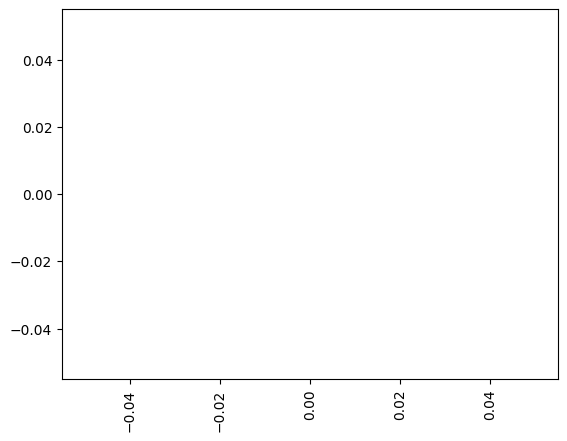

In [ ]:
missing = train.isnull().sum()
missing = missing[missing > 0]/938583 # 3adad rows
plt.bar(missing.index, missing.values)
plt.xticks(rotation = 90)
plt.show()
# Have a look in the discription
# Your findings ?

In [ ]:
train     #after removing dup and nulls

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp,label
0,0.041268,15499.00,64.00,7805.845961,7805.845961,0.0,0.0,0.00,0.00,50.00,...,0,0,0,0,0,0,0,1,0,DDoS
1,0.018393,3702.54,64.00,6728.994198,6728.994198,0.0,0.0,0.00,0.01,54.28,...,0,0,0,0,0,0,0,1,0,DDoS
2,0.000000,182.00,64.00,38.559448,38.559448,0.0,0.0,0.00,0.00,182.00,...,0,0,0,0,0,0,0,1,0,DoS
3,0.109292,35027.55,62.72,6783.234241,6783.234241,0.0,0.0,0.03,0.11,65.11,...,0,0,0,0,0,0,0,1,0,DoS
4,0.000000,162.00,64.00,2.305494,2.305494,0.0,0.0,0.00,0.00,162.00,...,0,0,0,0,0,0,0,1,0,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938577,0.892084,182058.50,64.00,134.759195,134.759195,0.0,0.0,0.00,0.00,1514.00,...,0,0,0,0,0,0,0,0,0,DDoS
938578,0.000000,55.41,63.91,42.798147,42.798147,0.0,0.0,1.00,1.00,80.79,...,0,0,1,1,0,0,1,0,0,DDoS
938580,0.292916,33157.18,64.00,80328.529520,80328.529520,0.0,0.0,0.00,0.00,50.24,...,0,0,0,0,0,0,0,1,0,DoS
938581,0.093229,29205.50,63.36,6208.472050,6208.472050,0.0,0.0,0.00,0.00,50.70,...,0,0,0,0,0,0,0,1,0,DDoS


In [ ]:
# get the  quantitative features
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']


quantitative_data = train[quantitative]
quantitative_data.head()

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,fin_flags,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp
0,0.041268,15499.00,64.00,7805.845961,7805.845961,0.0,0.0,0.00,0.00,50.00,...,0,0,0,0,0,0,0,0,1,0
1,0.018393,3702.54,64.00,6728.994198,6728.994198,0.0,0.0,0.00,0.01,54.28,...,0,0,0,0,0,0,0,0,1,0
2,0.000000,182.00,64.00,38.559448,38.559448,0.0,0.0,0.00,0.00,182.00,...,0,0,0,0,0,0,0,0,1,0
3,0.109292,35027.55,62.72,6783.234241,6783.234241,0.0,0.0,0.03,0.11,65.11,...,0,0,0,0,0,0,0,0,1,0
4,0.000000,162.00,64.00,2.305494,2.305494,0.0,0.0,0.00,0.00,162.00,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
qualitative_data = train[qualitative]
qualitative_data.head()

,label
0,DDoS
1,DDoS
2,DoS
3,DoS
4,DoS


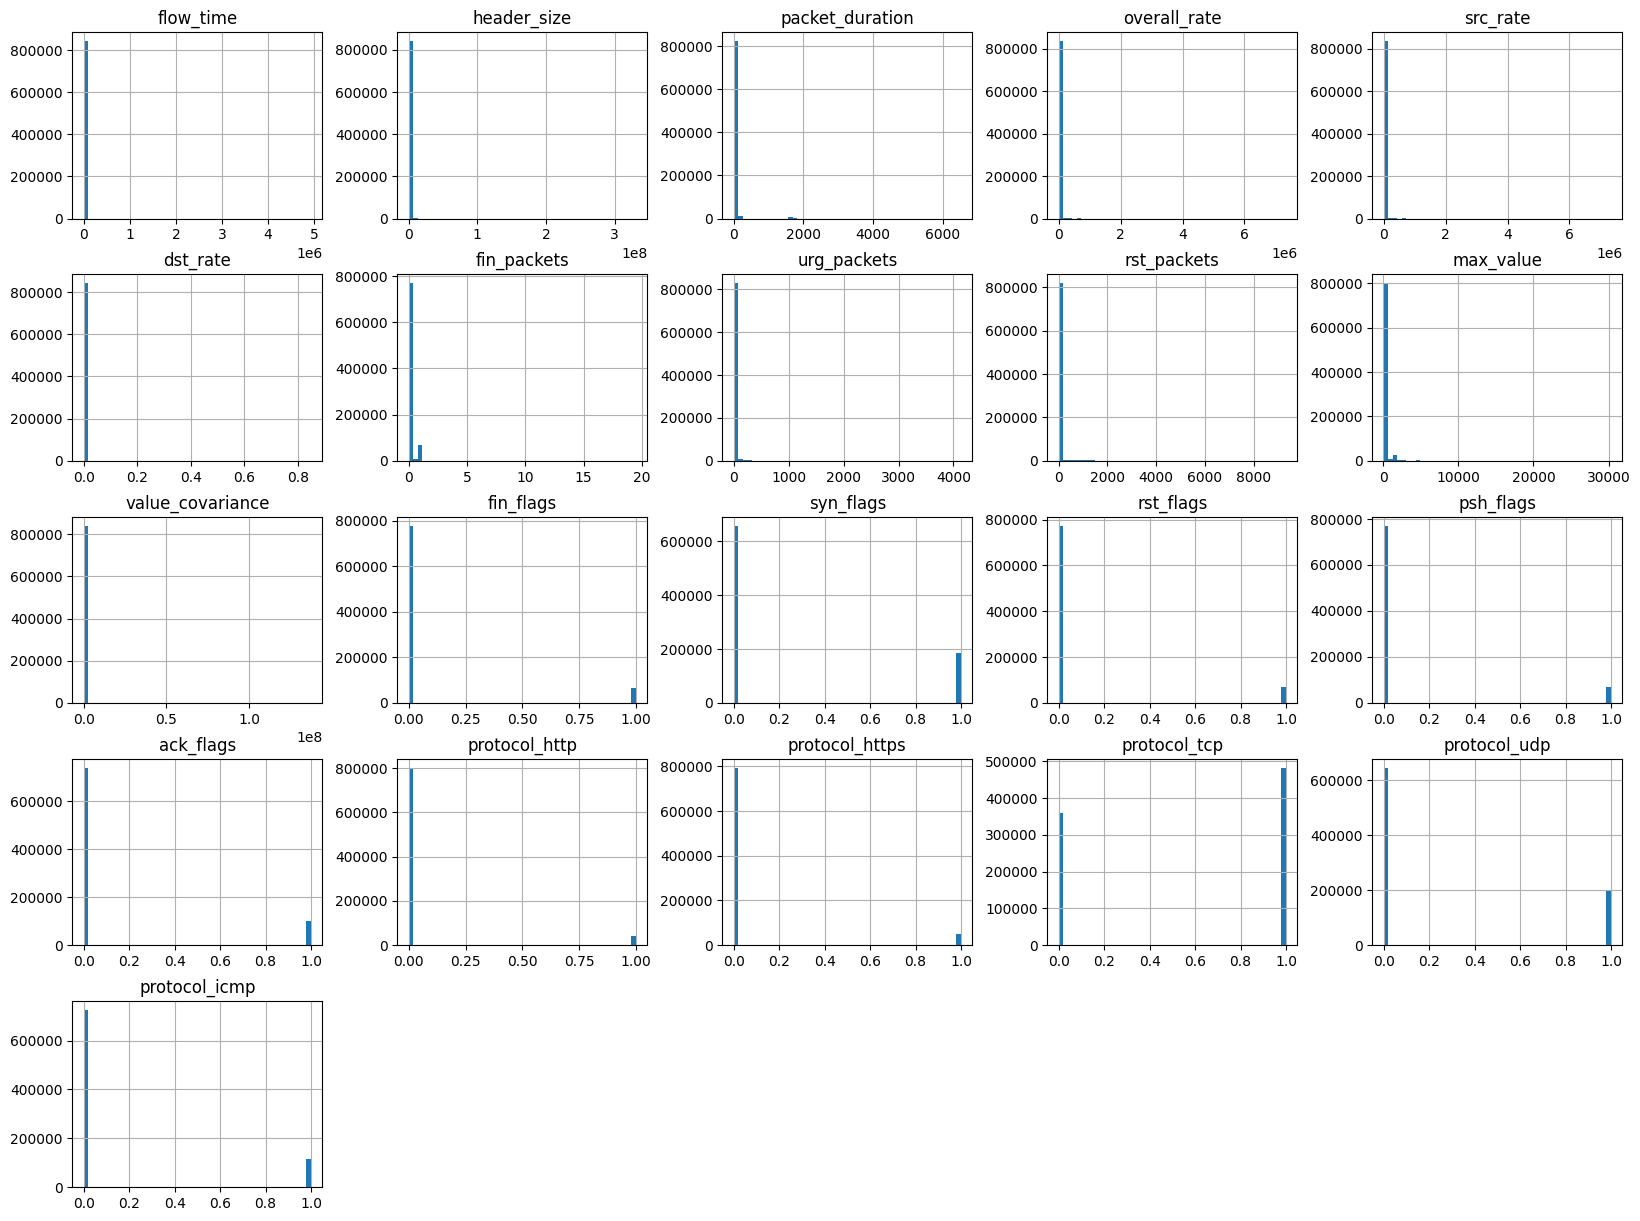

In [ ]:
quantitative_data.hist(bins=50, figsize=(20,15))
plt.show()


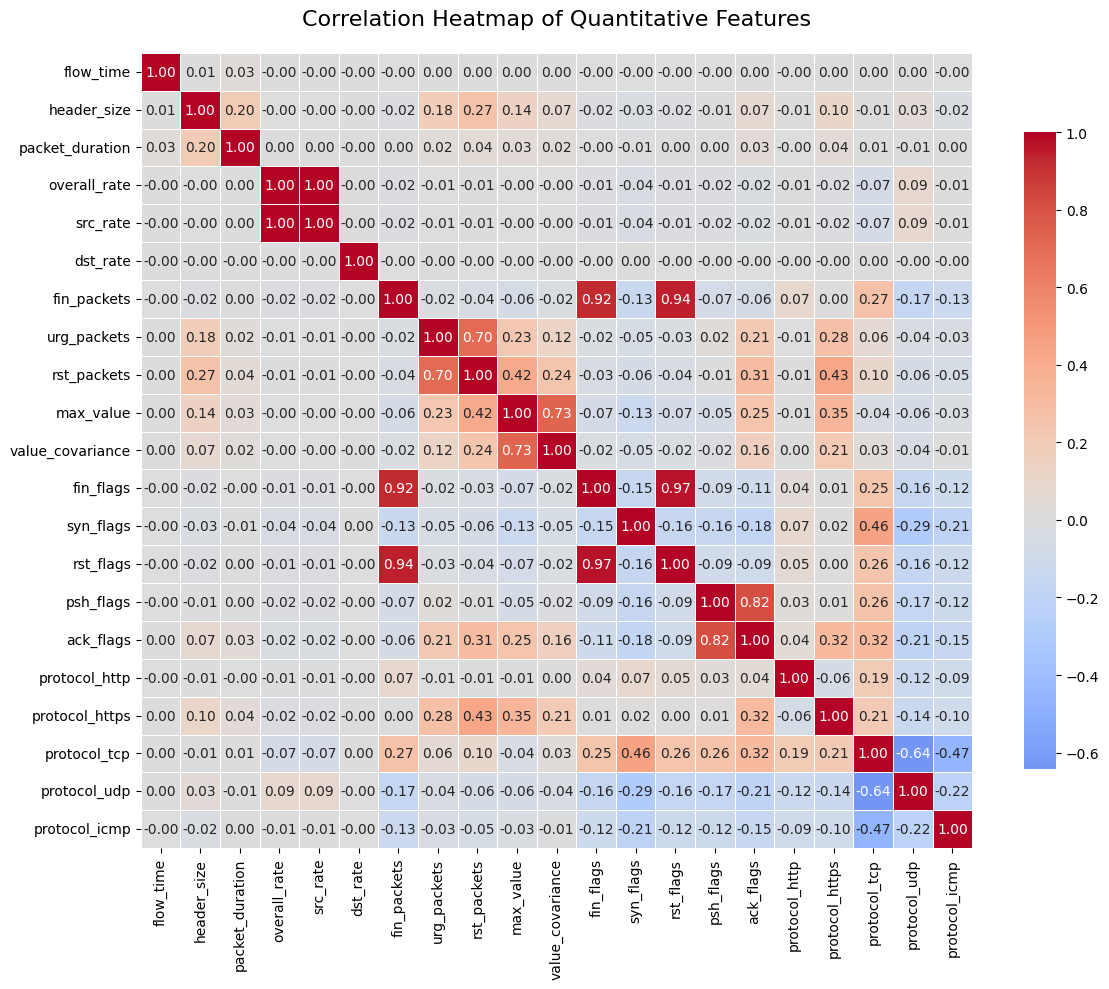

In [ ]:
corr = quantitative_data.corr()



plt.figure(figsize=(12, 10))



sns.heatmap(corr,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})



plt.title('Correlation Heatmap of Quantitative Features', pad=20, fontsize=16)

plt.tight_layout()
plt.show()

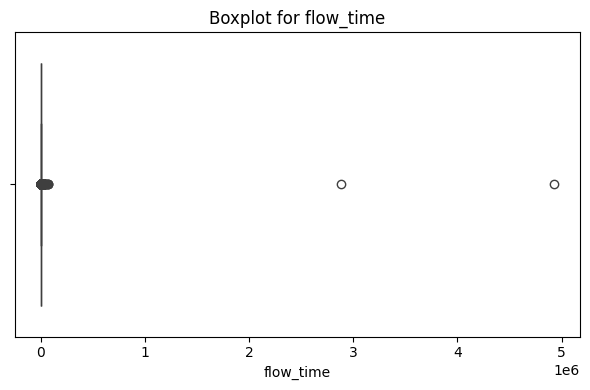

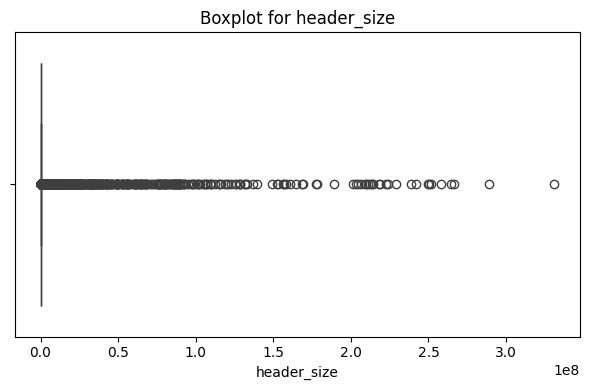

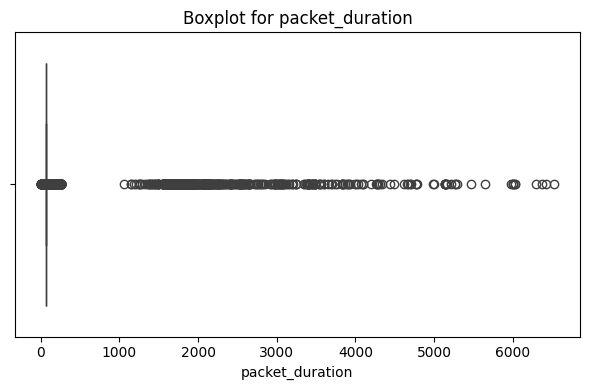

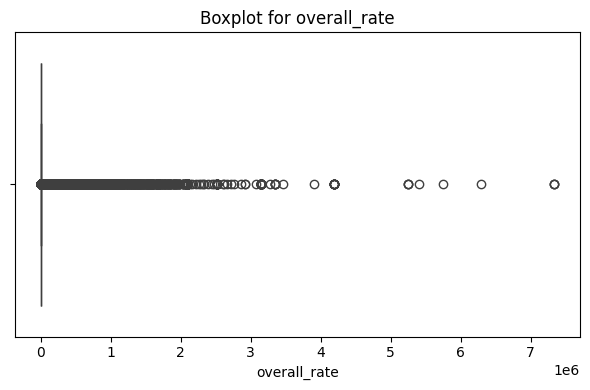

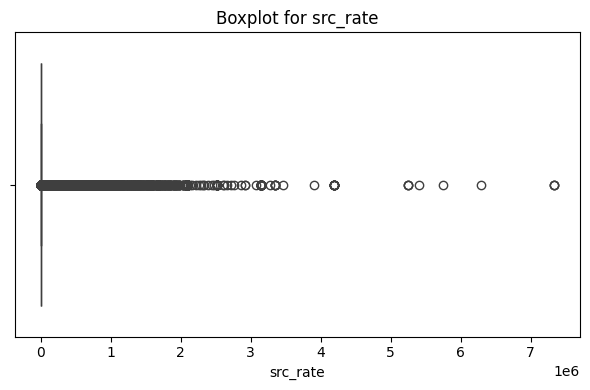

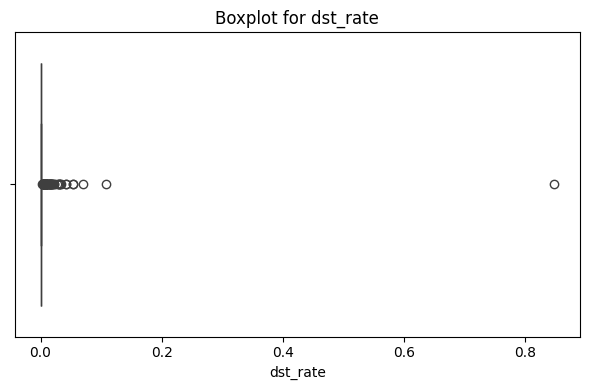

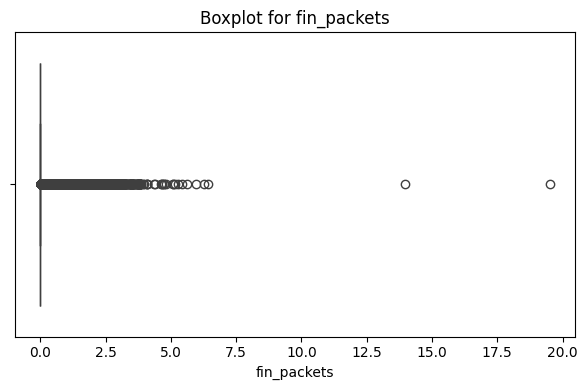

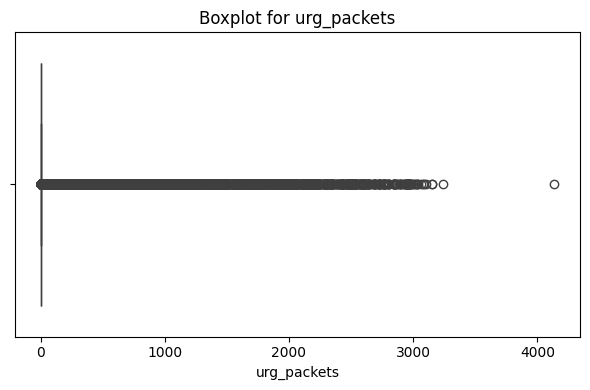

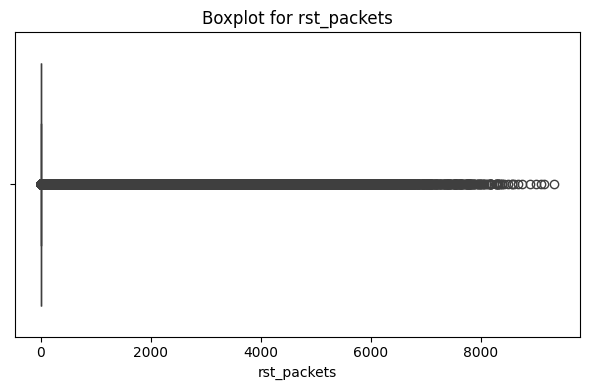

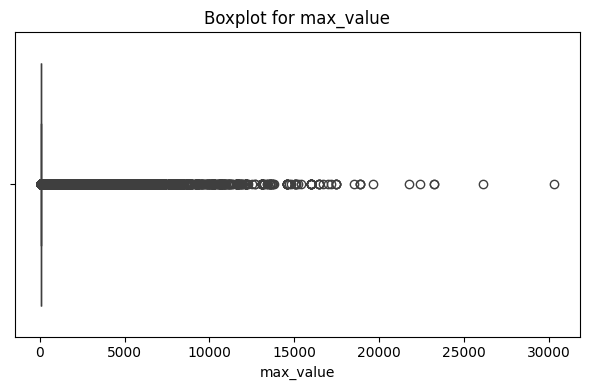

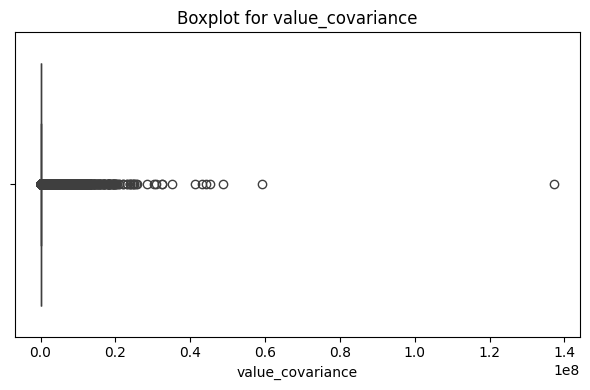

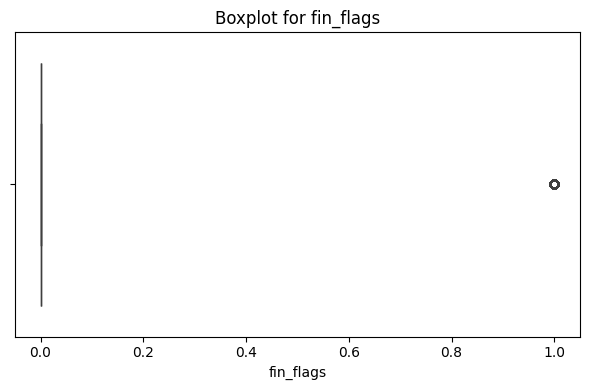

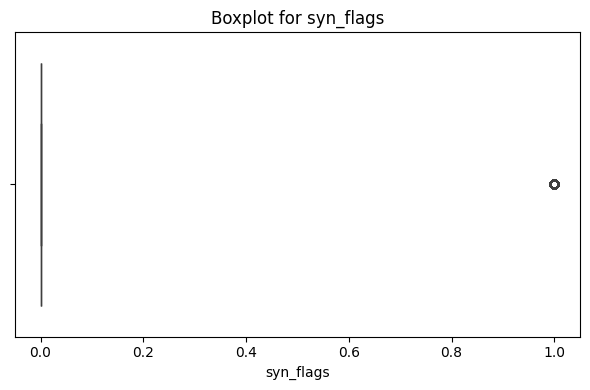

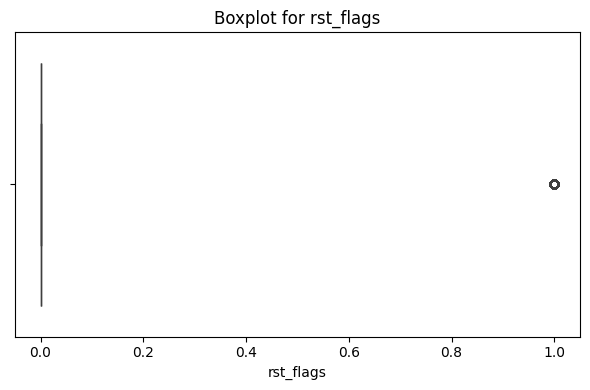

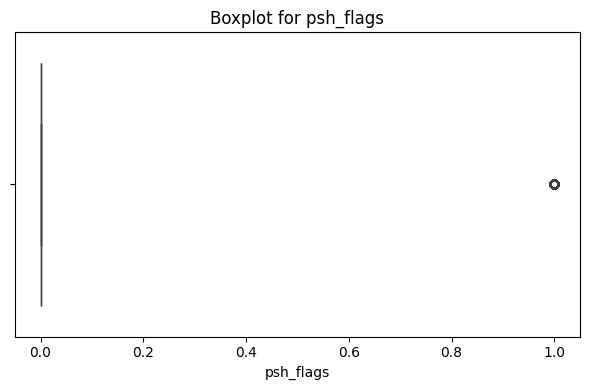

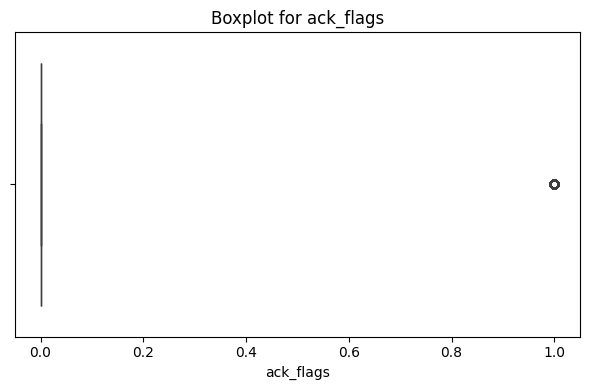

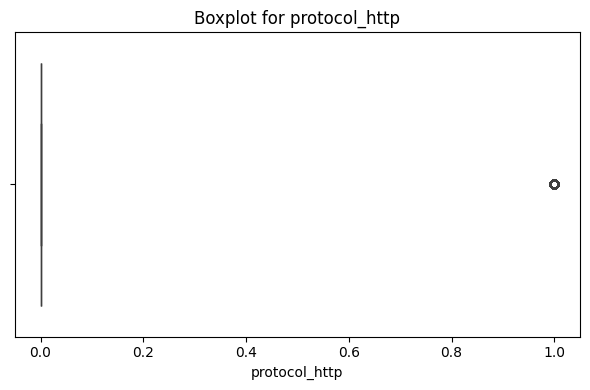

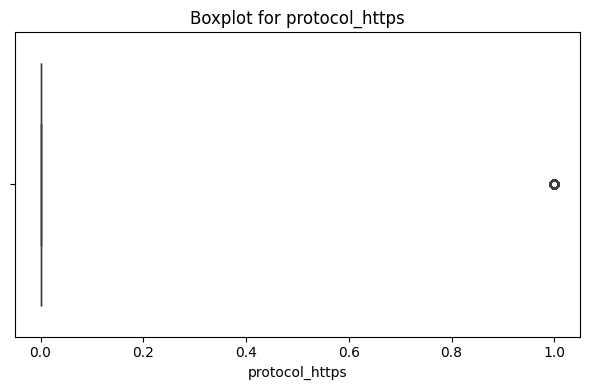

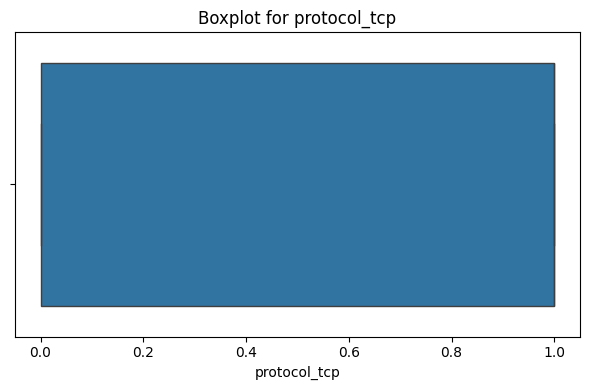

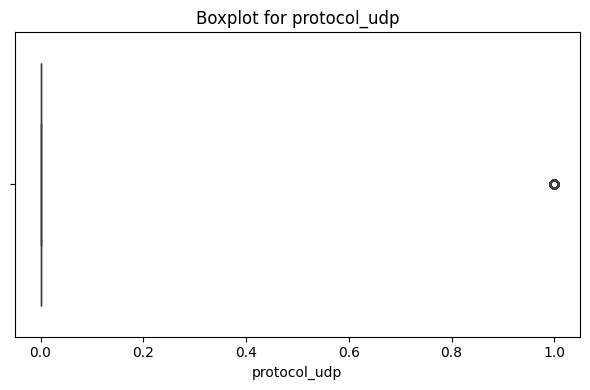

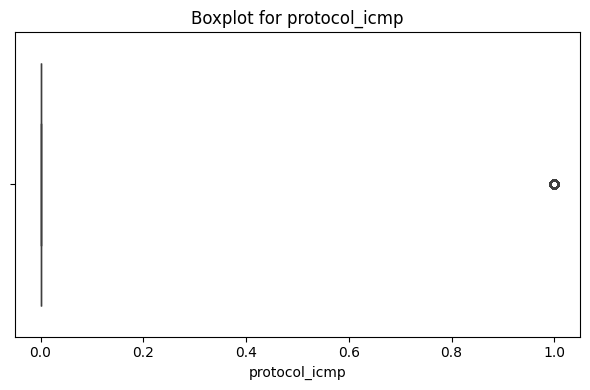

In [ ]:
for col in quantitative:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=train, x=col)
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
    plt.show()


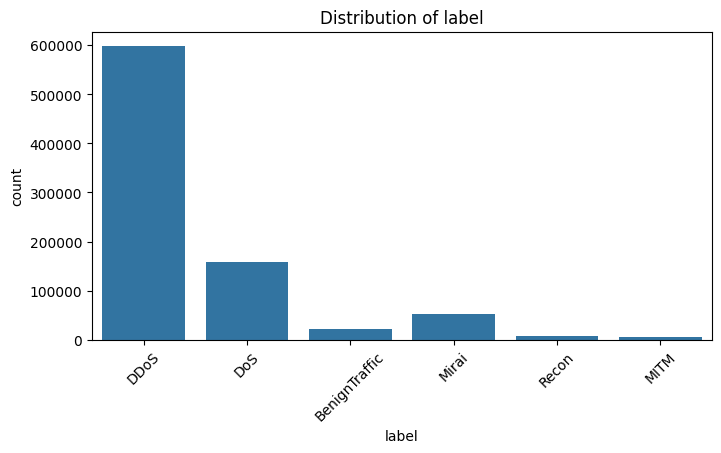

In [ ]:
for col in qualitative:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=qualitative_data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
X = train.drop(columns=['label'])
y = train['label']

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
selector_kbest = SelectKBest(score_func=f_classif, k=20)
X_kbest = selector_kbest.fit_transform(X_scaled, y_encoded)
selected_kbest = X.columns[selector_kbest.get_support()]




X_selected = X[selected_kbest]
X_scaled_selected = scaler.fit_transform(X_selected)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_selected, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Classes after SMOTE:", Counter(y_train_res))


Class distribution after SMOTE: Counter({np.int64(1): 478317, np.int64(2): 478317, np.int64(4): 478317, np.int64(5): 478317, np.int64(3): 478317, np.int64(0): 478317})


In [ ]:
# Model1: Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", acc_rf)
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


Random Forest Accuracy: 0.8583214624881291
               precision    recall  f1-score   support

BenignTraffic       0.84      0.93      0.88      4397
         DDoS       0.94      0.87      0.90    119580
          DoS       0.62      0.77      0.68     31699
         MITM       0.77      0.74      0.76      1263
        Mirai       0.99      0.99      0.99     10255
        Recon       0.72      0.71      0.71      1286

     accuracy                           0.86    168480
    macro avg       0.81      0.84      0.82    168480
 weighted avg       0.87      0.86      0.86    168480



In [ ]:
#model 3 : xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    eval_metric='mlogloss'
)
xgb.fit(X_train_res, y_train_res)
y_pred = xgb.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred)}")

XGBoost Accuracy: 0.8639


In [ ]:
#Model 4: LightGBM
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_res, y_train_res)
y_pred_lgbm = lgbm.predict(X_test)
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
print("\nLightGBM Accuracy:", acc_lgbm)
print(classification_report(y_test, y_pred_lgbm, target_names=le.classes_))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.468305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4623
[LightGBM] [Info] Number of data points in the train set: 2869902, number of used features: 20
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



LightGBM Accuracy: 0.8593839031339031
               precision    recall  f1-score   support

BenignTraffic       0.86      0.88      0.87      4397
         DDoS       0.94      0.87      0.90    119580
          DoS       0.62      0.79      0.69     31699
         MITM       0.69      0.74      0.71      1263
        Mirai       0.99      0.99      0.99     10255
        Recon       0.60      0.76      0.67      1286

     accuracy                           0.86    168480
    macro avg       0.78      0.84      0.81    168480
 weighted avg       0.88      0.86      0.87    168480



In [ ]:
#Model 5 - ensembling Stacking Classifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42))
]

stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    stack_method='predict_proba'
)

stacking.fit(X_train_res, y_train_res)
y_pred_stack = stacking.predict(X_test)
acc_stack = accuracy_score(y_test, y_pred_stack)
print("\nStacking Classifier Accuracy:", acc_stack)
print(classification_report(y_test, y_pred_stack, target_names=le.classes_))

In [ ]:
test = pd.read_csv('test.csv')

submission_ids = test['Id']

X_test_final = test.drop(columns=['Id'], errors='ignore')
X_test_final = test[selected_kbest]




X_test_final_scaled = scaler.transform(X_test_final)



y_test_pred_final = rf.predict(X_test_final_scaled)



y_test_labels = le.inverse_transform(y_test_pred_final)





submission = pd.DataFrame({
    'Id': np.arange(len(test)),
    'label': y_test_labels
})




submission.to_csv('best_submission.csv', index=False)
print("Submission saved to 'submission.csv'")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Submission saved to 'submission.csv'


In [ ]:
cr_rf_dict = classification_report(y_test, y_pred_rf, output_dict=True)
cr_stack_dict = classification_report(y_test, y_pred_stack, output_dict=True)

# **Approach 2 - XGB**

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

In [ ]:
data=pd.read_csv("content\phase2_students.csv")
df=pd.DataFrame(data)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Omar\AppData\Local\Temp\ipykernel_33932\3183017559.py:1: SyntaxWarning: invalid escape sequence '\D'
  data=pd.read_csv("D:\DownLoad\projects\Multi_claasification_model\data\phase2_students.csv")


In [ ]:
for col in df.select_dtypes(include=['int','float']).columns :
    if(df[col]<0).any():
        df[col]=df[col].clip(lower=0)

In [ ]:
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])

In [ ]:
X = df.drop(columns=['label'])
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train_scaled, y_train)

d:\DownLoad\projects\Multi_claasification_model\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:48:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_scaled)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {acc_xgb:.4f}")
recall_xgb= recall_score(y_test, y_pred_xgb,average='macro')
print(f"XGBoost recall: {recall_xgb:.4f}")
per_xgb = precision_score(y_test, y_pred_xgb,average='macro')
print(f"XGBoost percesion: {per_xgb:.4f}")
f1_xgb = f1_score(y_test, y_pred_xgb,average='macro')
print(f"XGBoost f1_score: {f1_xgb:.4f}")


XGBoost Accuracy: 0.9110
XGBoost recall: 0.8192
XGBoost percesion: 0.8749
XGBoost f1_score: 0.8412


In [ ]:
cr_xgb_dict = classification_report(y_test, y_pred_xgb, output_dict=True)

In [ ]:
import joblib


joblib.dump(xgb_model,r"D:\DownLoad\projects\Multi_claasification_model\\final_approach\saved_models\xgb_model.joblib")

['D:\\DownLoad\\projects\\Multi_claasification_model\\\\final_approach\\saved_models\\xgb_model.joblib']

In [ ]:
test= pd.read_csv('D:\DownLoad\projects\Multi_claasification_model\data\\test.csv')



<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Omar\AppData\Local\Temp\ipykernel_33932\2443950429.py:1: SyntaxWarning: invalid escape sequence '\D'
  test= pd.read_csv('D:\DownLoad\projects\Multi_claasification_model\data\\test.csv')


In [ ]:
test_ids = test['Id']
test_features = test.drop(columns=['Id'])


for col in df.select_dtypes(include=['int','float']).columns:
    if col in test_features.columns and (test_features[col] < 0).any():
        test_features[col] = test_features[col].clip(lower=0)


test_scaled = scaler.transform(test_features)

In [ ]:
preds_xgb =xgb_model.predict(test_scaled)
preds_xgb_decoded = le.inverse_transform(preds_xgb)
submission_xgb = pd.DataFrame({'Id': test_ids, 'label': preds_xgb_decoded})
submission_xgb.to_csv(
    'D:\DownLoad\projects\Multi_claasification_model\\final_approach\submission.csv',index=False)
print("XGBoost submission file created: submission_xgboost.csv")

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Omar\AppData\Local\Temp\ipykernel_33932\1518439713.py:5: SyntaxWarning: invalid escape sequence '\D'
  'D:\DownLoad\projects\Multi_claasification_model\\final_approach\submission.csv',index=False)


XGBoost submission file created: submission_xgboost.csv


# **Approach 3 - LGB**

In [ ]:
!pip install xgboost
!pip install lightgbm

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score

In [ ]:
data=pd.read_csv('/content/phase2_students.csv')
dftrain=pd.DataFrame(data)
dftrain.head()

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp,label
0,0.041268,15499.00,64.00,7805.845961,7805.845961,0.0,0.0,0.00,0.00,50.00,...,0,0,0,0,0,0,0,1,0,DDoS
1,0.018393,3702.54,64.00,6728.994198,6728.994198,0.0,0.0,0.00,0.01,54.28,...,0,0,0,0,0,0,0,1,0,DDoS
2,0.000000,182.00,64.00,38.559448,38.559448,0.0,0.0,0.00,0.00,182.00,...,0,0,0,0,0,0,0,1,0,DoS
3,0.109292,35027.55,62.72,6783.234241,6783.234241,0.0,0.0,0.03,0.11,65.11,...,0,0,0,0,0,0,0,1,0,DoS
4,0.000000,162.00,64.00,2.305494,2.305494,0.0,0.0,0.00,0.00,162.00,...,0,0,0,0,0,0,0,1,0,DoS


In [ ]:
dftrain.shape

(938583, 22)

In [ ]:
dftrain['label'].value_counts()

,count
label,
DDoS,687027
DoS,163428
Mirai,53395
BenignTraffic,21987
Recon,6433
MITM,6313


In [ ]:
dftrain.isna().sum()

,0
flow_time,0
header_size,0
packet_duration,0
overall_rate,0
src_rate,0
dst_rate,0
fin_packets,0
urg_packets,0
rst_packets,0
max_value,0


In [ ]:
dftrain.describe()

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,fin_flags,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp
count,9.385830e+05,9.385830e+05,938583.000000,9.385830e+05,9.385830e+05,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,...,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000
mean,1.342515e+01,1.018134e+05,82.664589,9.163496e+03,9.163496e+03,0.000002,0.099474,5.850813,37.137514,177.161360,...,0.087102,0.208346,0.091149,0.088415,0.121502,0.048001,0.054196,0.574175,0.211410,0.164314
std,5.898099e+03,1.801377e+06,166.986325,1.001806e+05,1.001806e+05,0.000898,0.299712,70.715367,324.613580,515.425327,...,0.281984,0.406126,0.287821,0.283898,0.326710,0.213769,0.226403,0.494468,0.408309,0.370560
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,42.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,5.400000e+01,64.000000,2.077046e+00,2.077046e+00,0.000000,0.000000,0.000000,0.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,5.400000e+01,64.000000,1.570377e+01,1.570377e+01,0.000000,0.000000,0.000000,0.000000,54.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.017542e-01,3.640000e+02,64.000000,1.177706e+02,1.177706e+02,0.000000,0.000000,0.000000,0.010000,55.140000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.930147e+06,3.311174e+08,6525.740000,7.340032e+06,7.340032e+06,0.848465,19.500000,4136.700000,9331.500000,30329.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


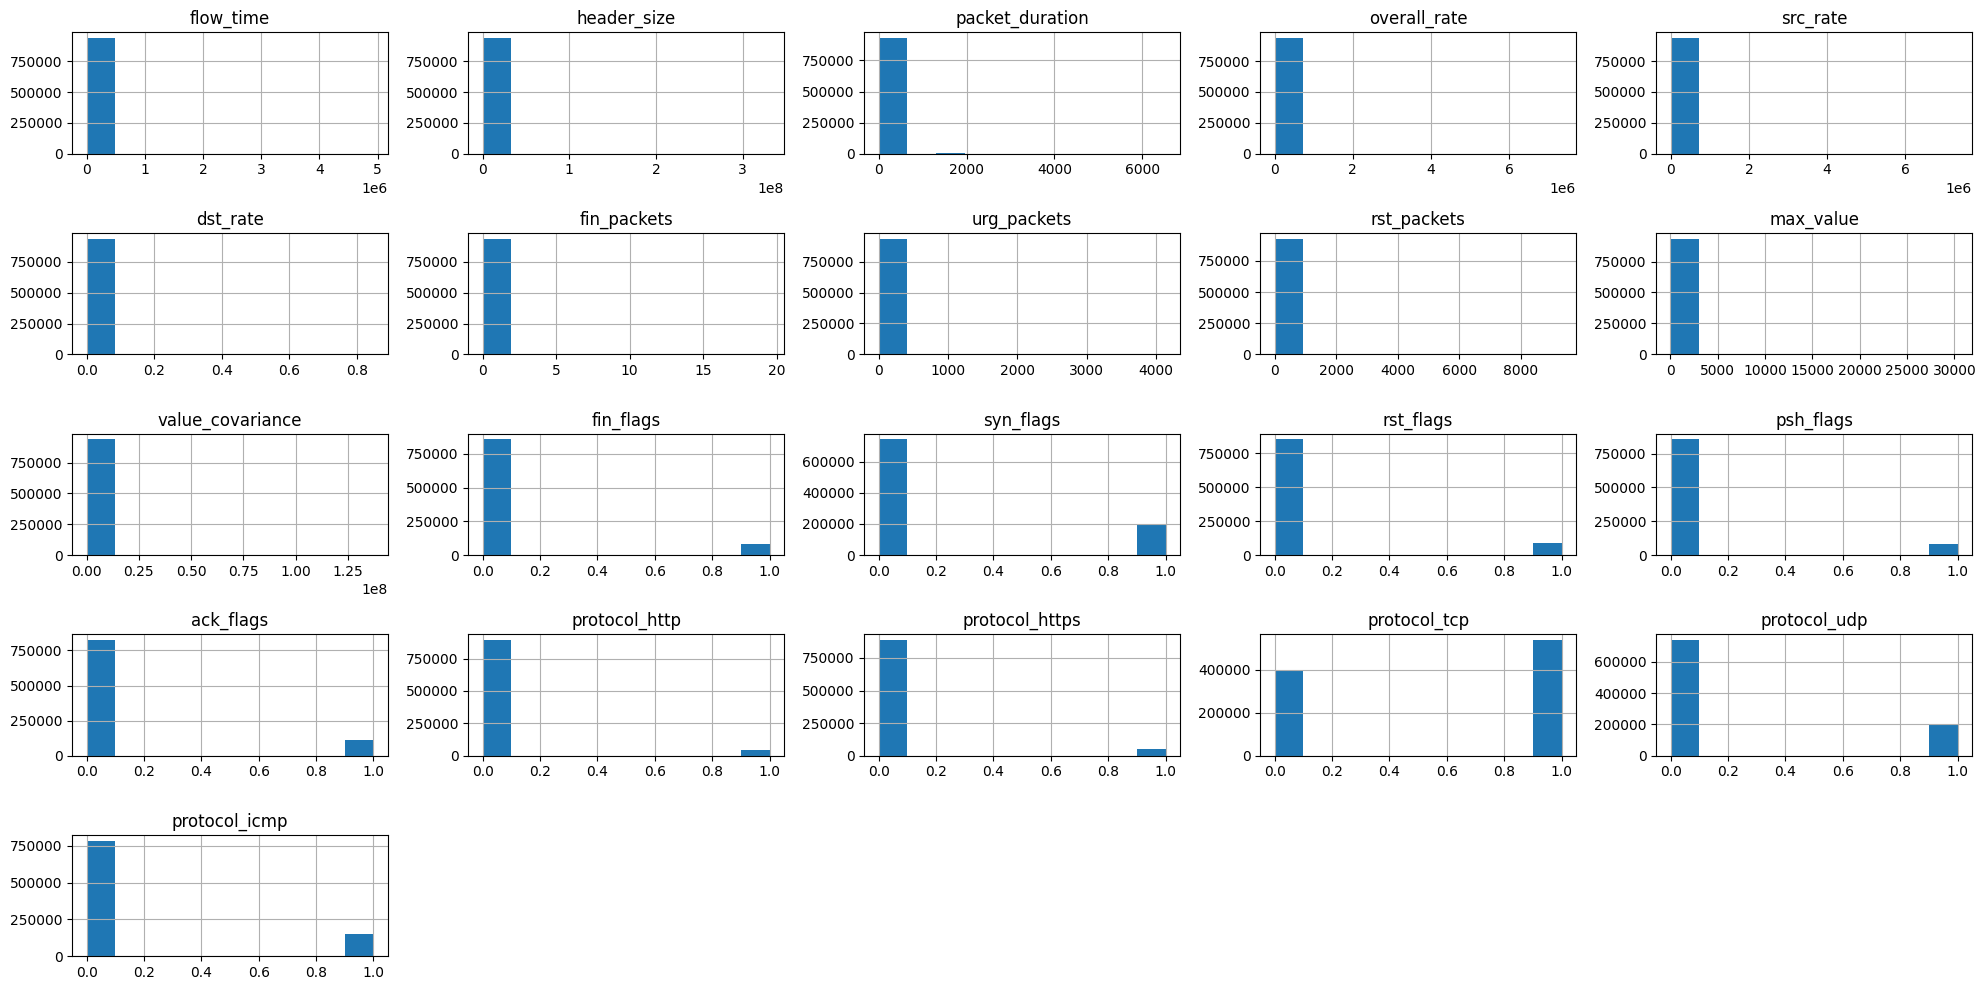

In [ ]:
numeric_columns=dftrain.select_dtypes(include=['int','float']).hist(bins=10,figsize=(20,10))
plt.tight_layout()
plt.show()

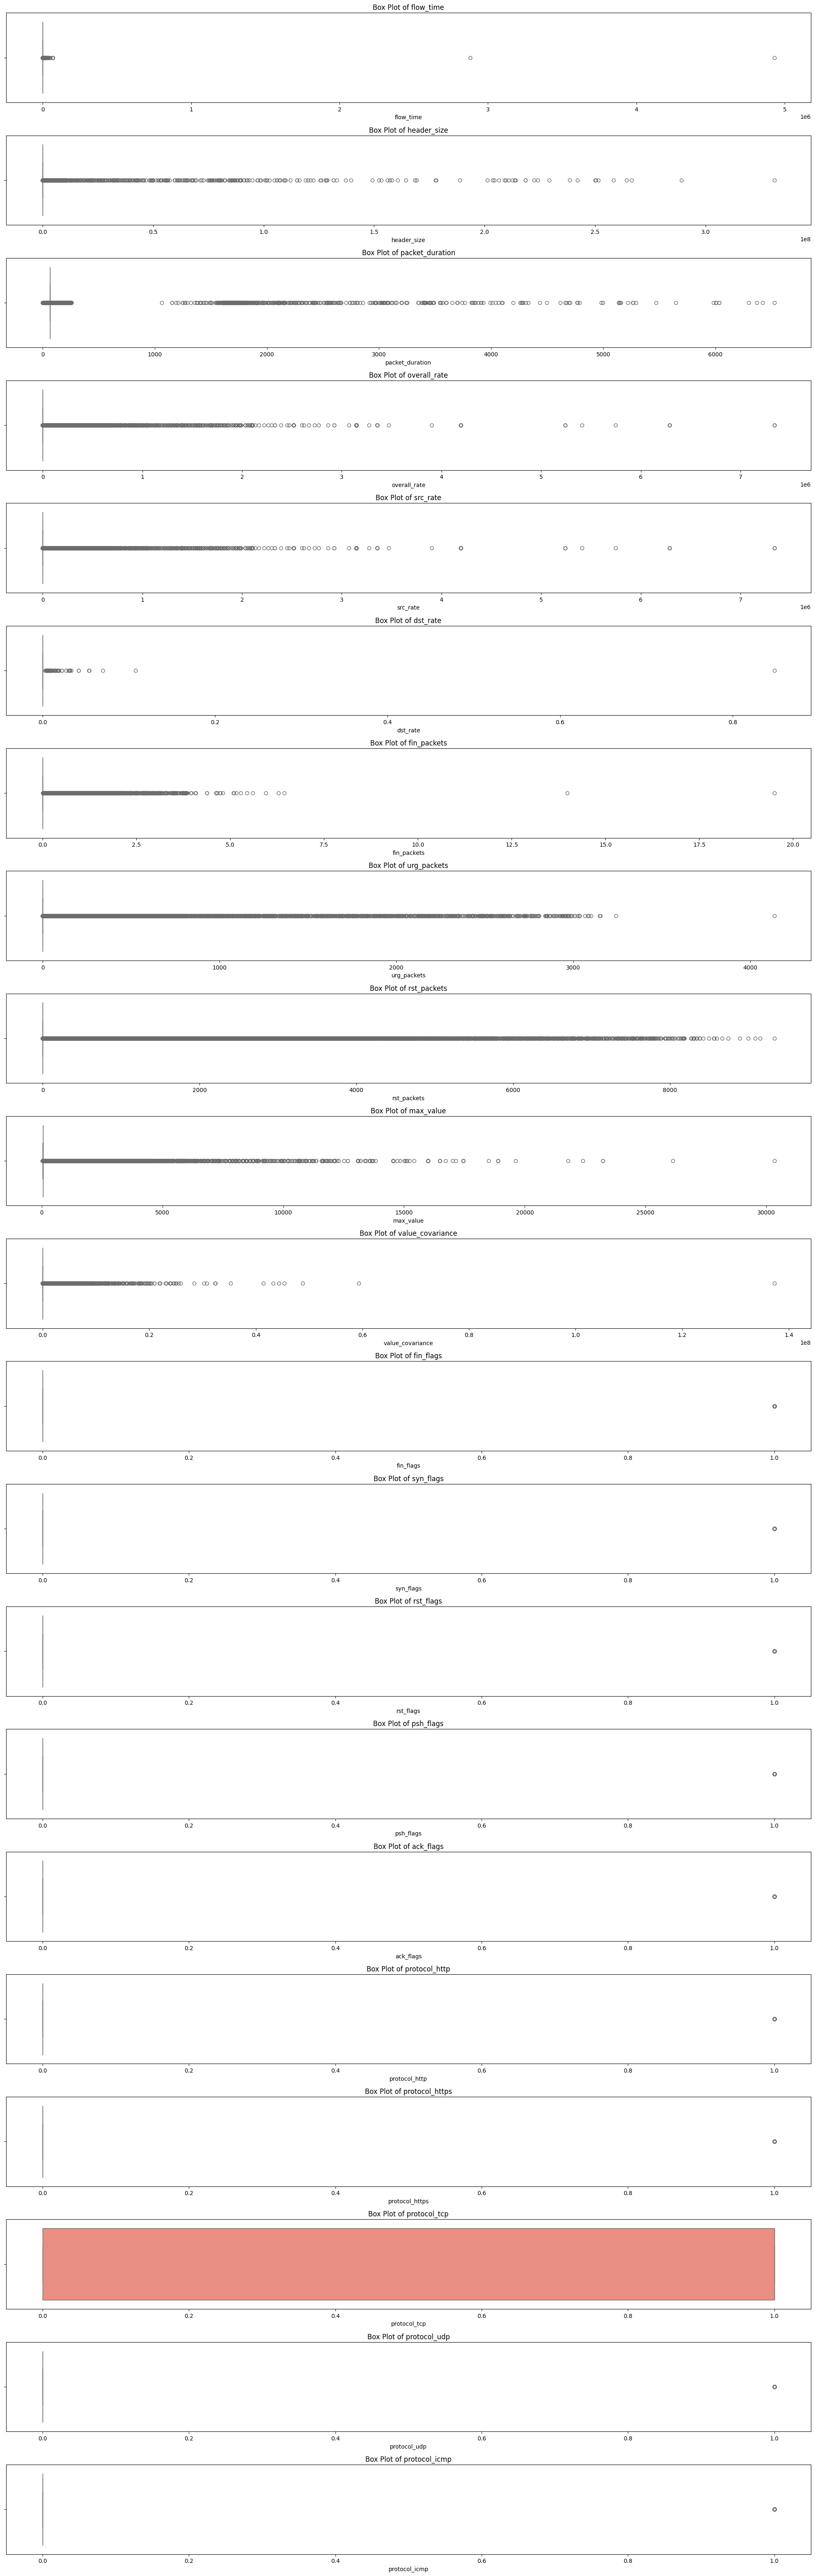

In [ ]:
numeric_column_names=dftrain.select_dtypes(include=['int','float']).columns
plt.figure(figsize=(20, len(numeric_column_names) * 3))
for i, col in enumerate(numeric_column_names, 1):
    plt.subplot(len(numeric_column_names), 1, i)
    sns.boxplot(x=dftrain[col], color='salmon')
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
plt.show()

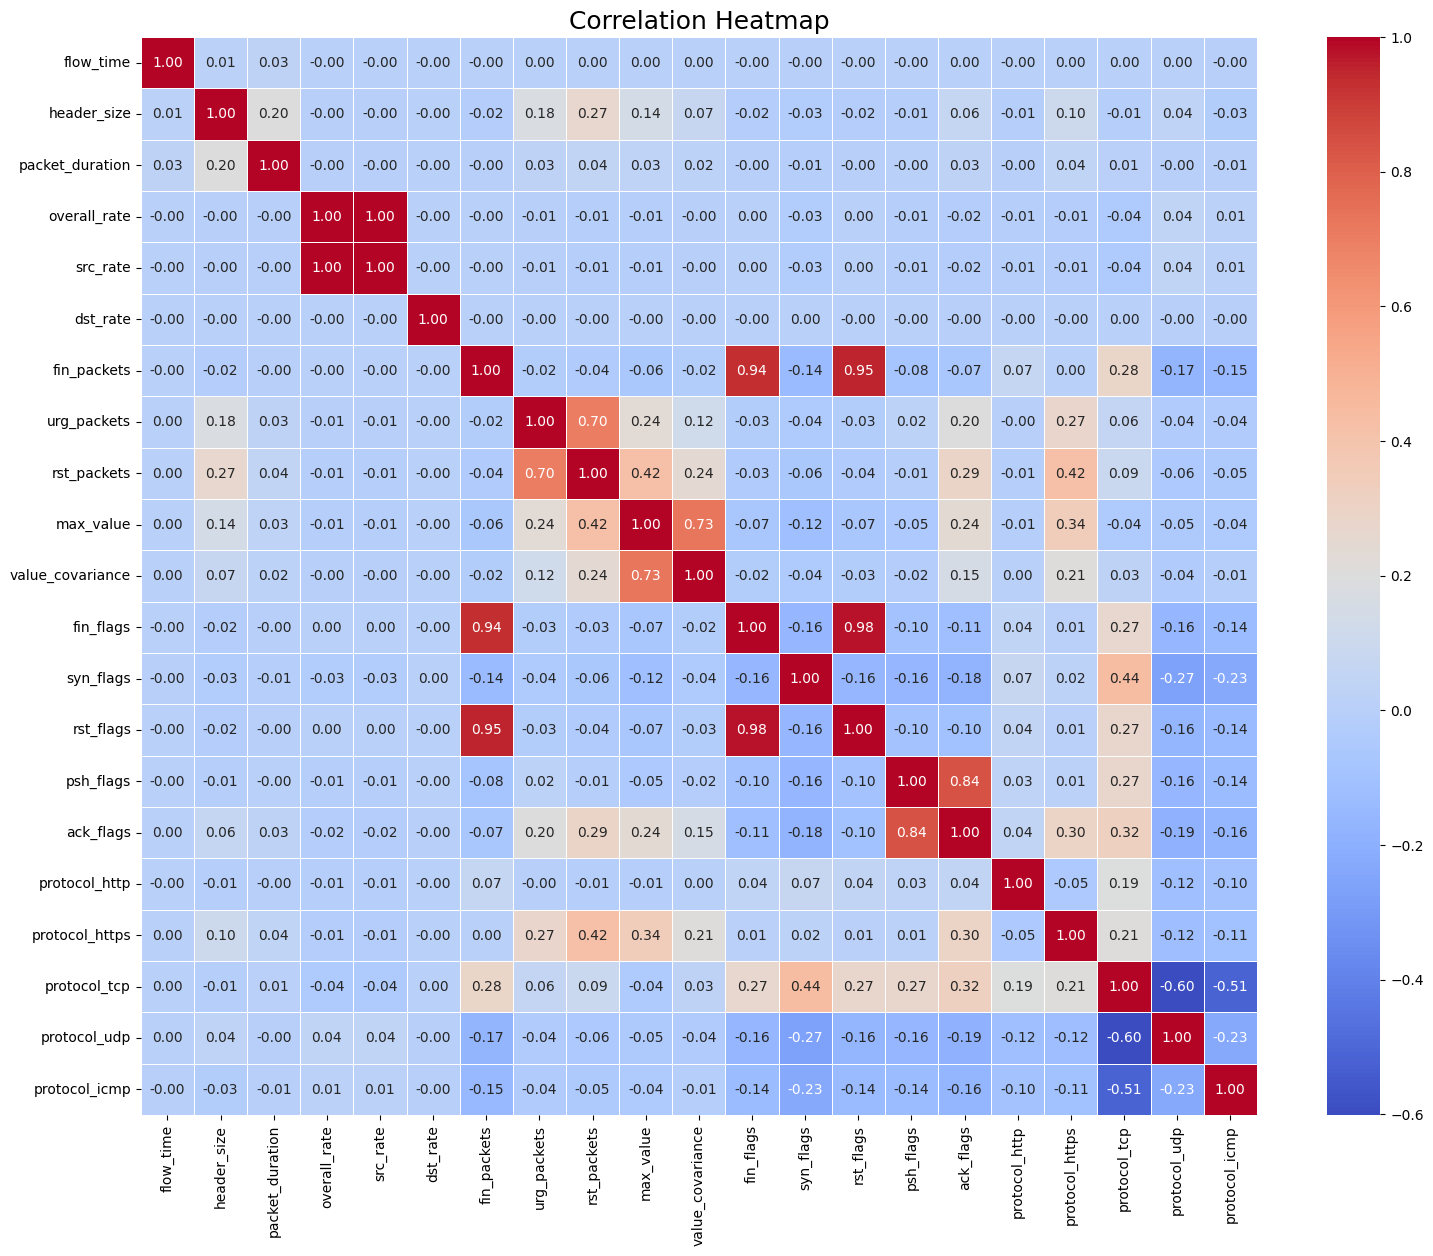

In [ ]:
numeric=dftrain.select_dtypes(include=['int','float'])
correlation_matrix = numeric.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

In [ ]:
for col in dftrain.select_dtypes(include=["float64","int64"]).columns:
        Q1 = dftrain[col].quantile(0.25)
        Q3 = dftrain[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        dftrain[col] = dftrain[col].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
dftrain.describe()

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,fin_flags,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp
count,938583.000000,938583.000000,938583.0,938583.000000,938583.000000,938583.0,938583.0,938583.0,938583.000000,938583.000000,...,938583.0,938583.0,938583.0,938583.0,938583.0,938583.0,938583.0,938583.000000,938583.0,938583.0
mean,0.065008,246.525948,64.0,81.538895,81.538895,0.0,0.0,0.0,0.006080,53.698010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.574175,0.0,0.0
std,0.100275,335.754725,0.0,116.836959,116.836959,0.0,0.0,0.0,0.010485,6.108666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.494468,0.0,0.0
min,0.000000,0.000000,64.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,42.290000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
25%,0.000000,54.000000,64.0,2.077046,2.077046,0.0,0.0,0.0,0.000000,50.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
50%,0.000000,54.000000,64.0,15.703769,15.703769,0.0,0.0,0.0,0.000000,54.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
75%,0.101754,364.000000,64.0,117.770621,117.770621,0.0,0.0,0.0,0.010000,55.140000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
max,0.254386,829.000000,64.0,291.310984,291.310984,0.0,0.0,0.0,0.025000,62.850000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0


In [ ]:
dftrain.to_csv("/content/dftrain.csv")

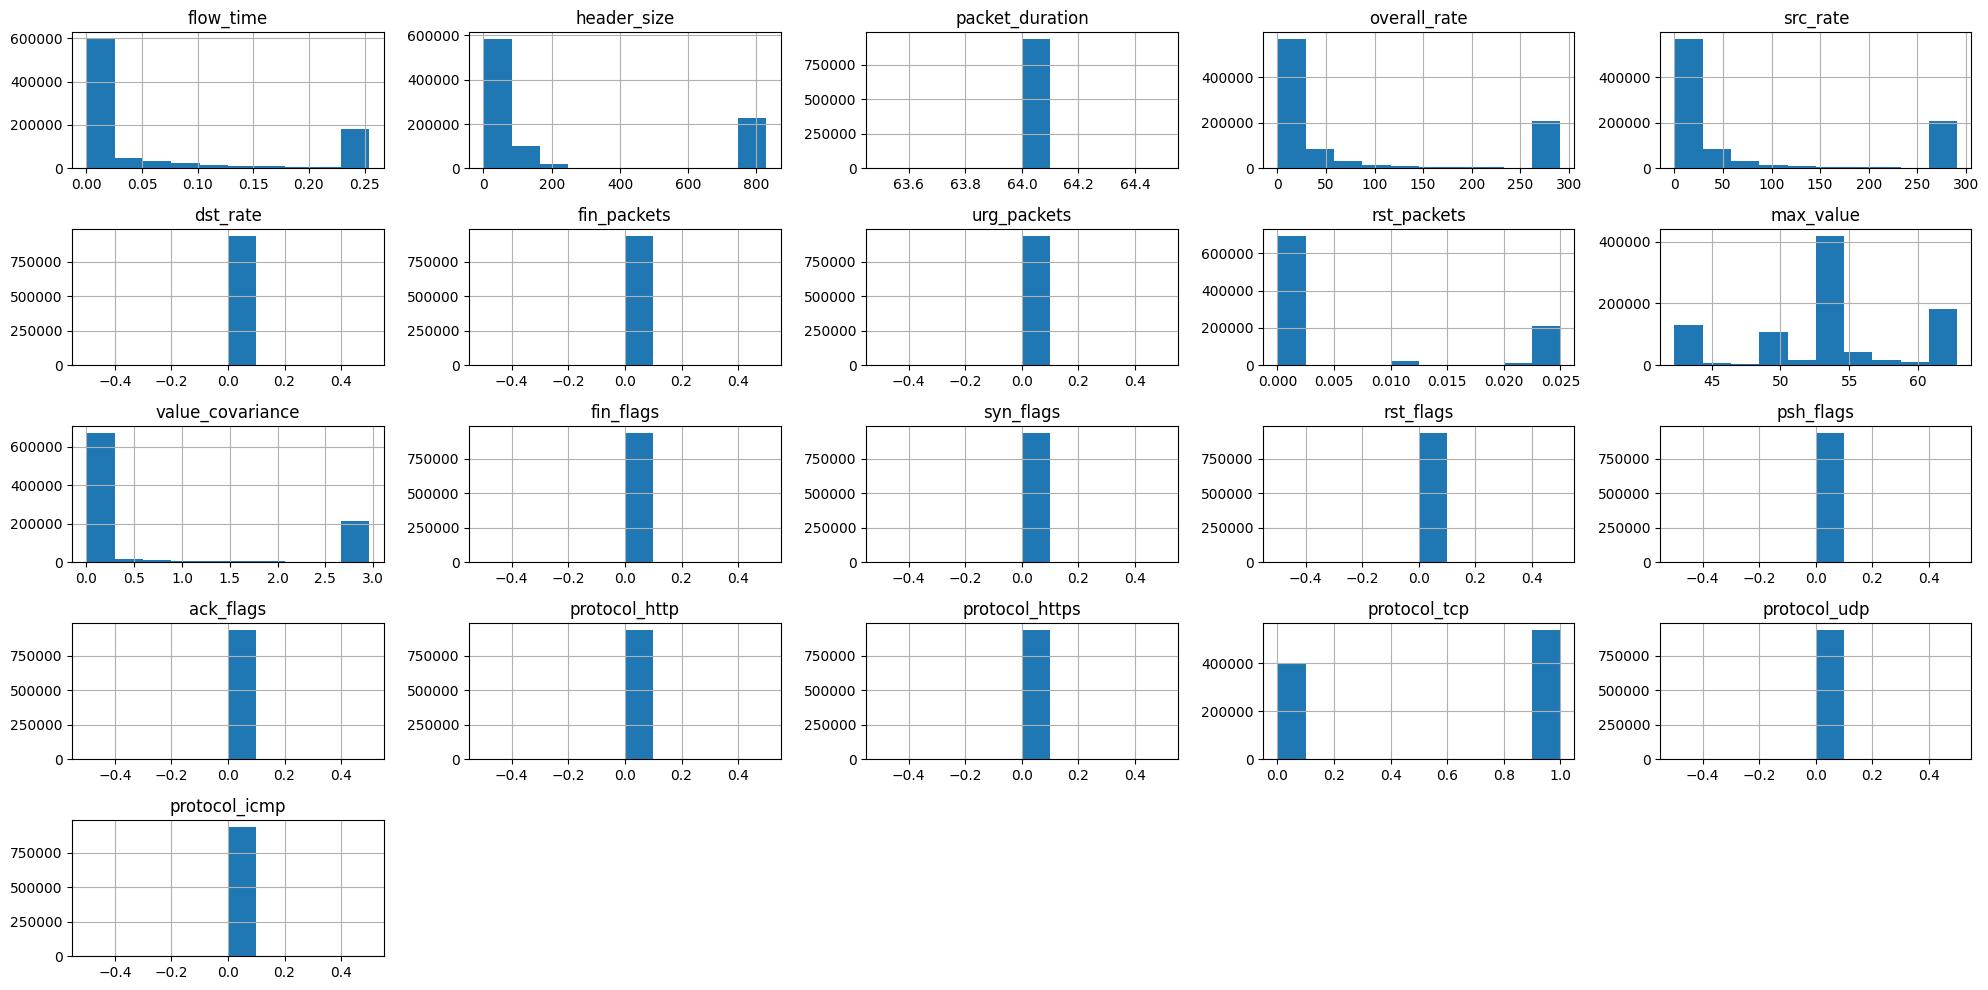

In [ ]:
# data=pd.read_csv("/content/dfw.csv")
# dftrain=pd.DataFrame(data)
numeric_columns_dftrain=dftrain.select_dtypes(include=['int','float']).hist(bins=10,figsize=(20,10))
plt.tight_layout()
plt.show()

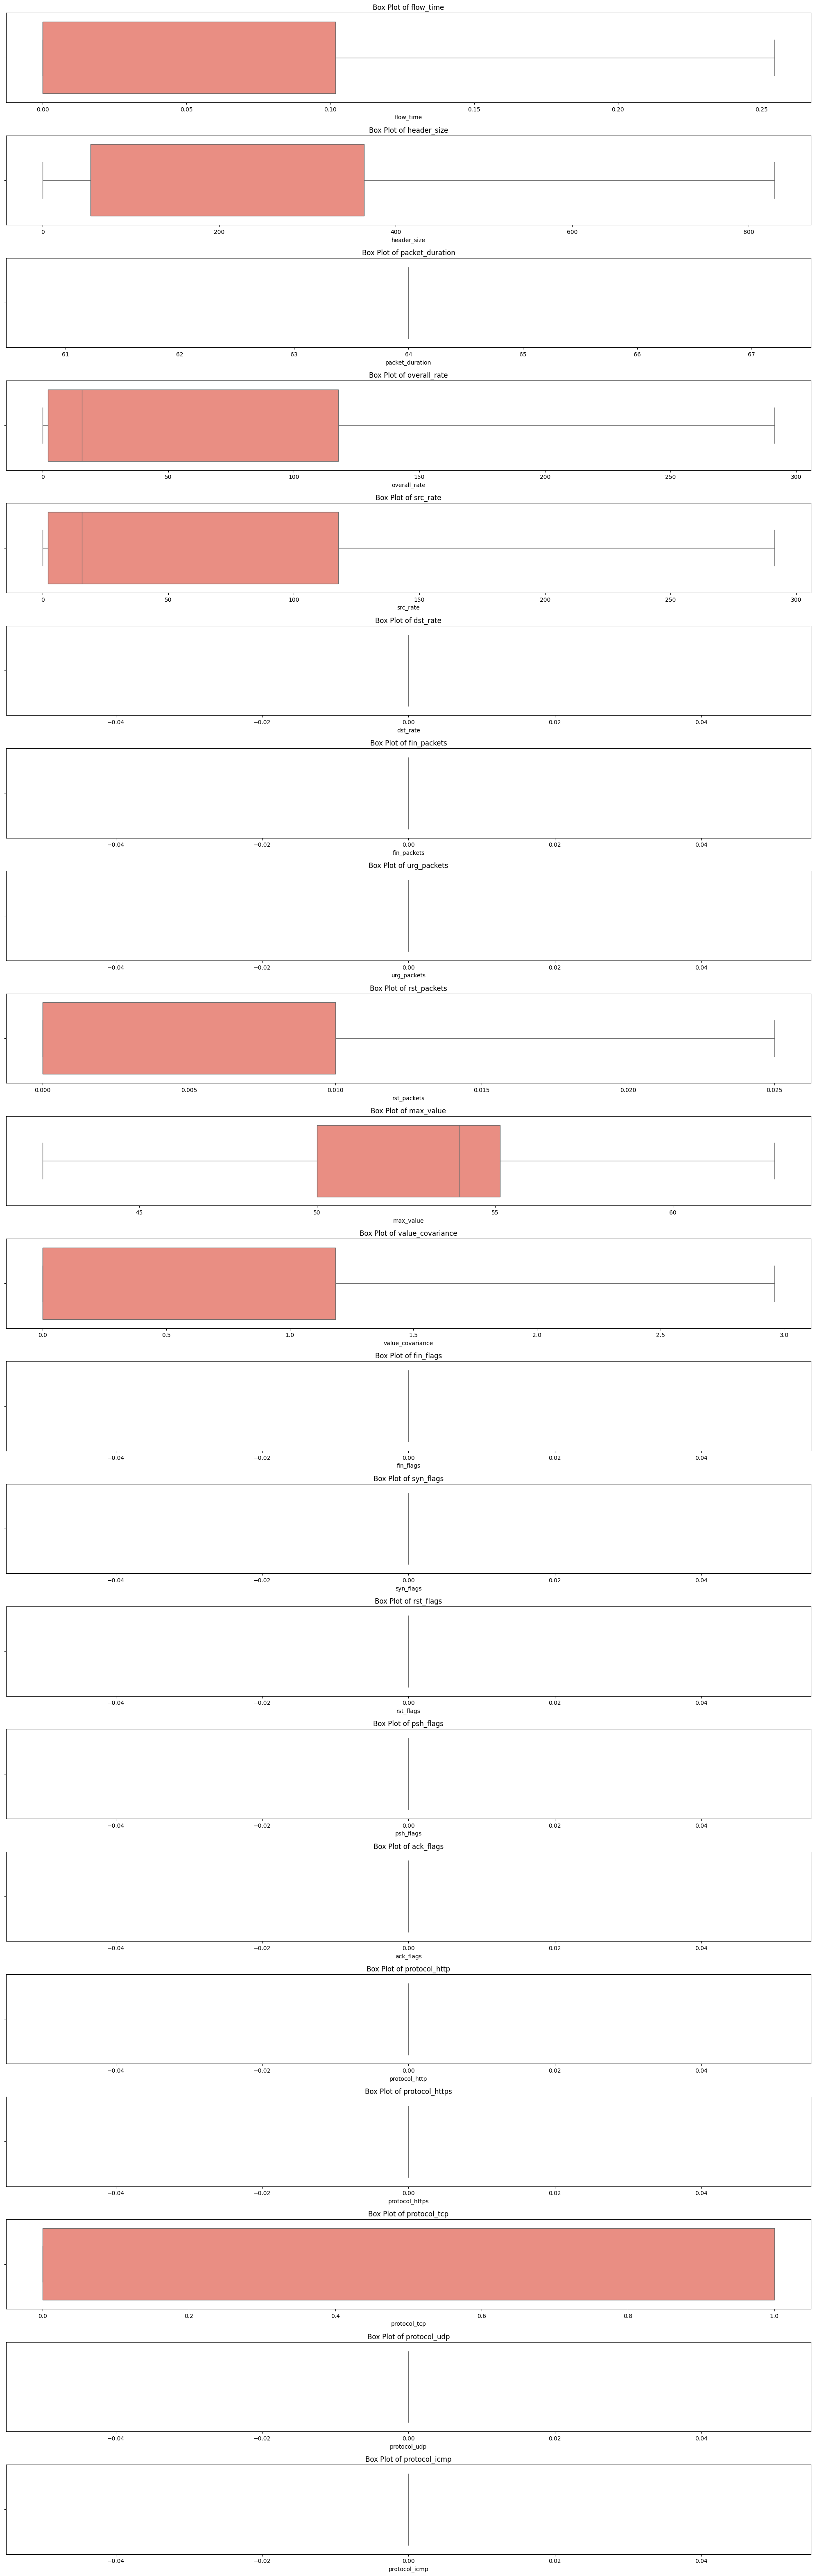

In [ ]:
numeric_column_names_dftrain=dftrain.select_dtypes(include=['int','float']).columns
plt.figure(figsize=(20, len(numeric_column_names_dftrain) * 3))
for i, col in enumerate(numeric_column_names_dftrain, 1):
    plt.subplot(len(numeric_column_names_dftrain), 1, i)
    sns.boxplot(x=dftrain[col], color='salmon')
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
plt.show()

In [ ]:
def clean_column_names(df):
    cleaned_names = {col: re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in df.columns}
    df = df.rename(columns=cleaned_names)
    return df

In [ ]:
dftrain = clean_column_names(dftrain)

In [ ]:
le = LabelEncoder()
dftrain['label'] = le.fit_transform(dftrain['label'])

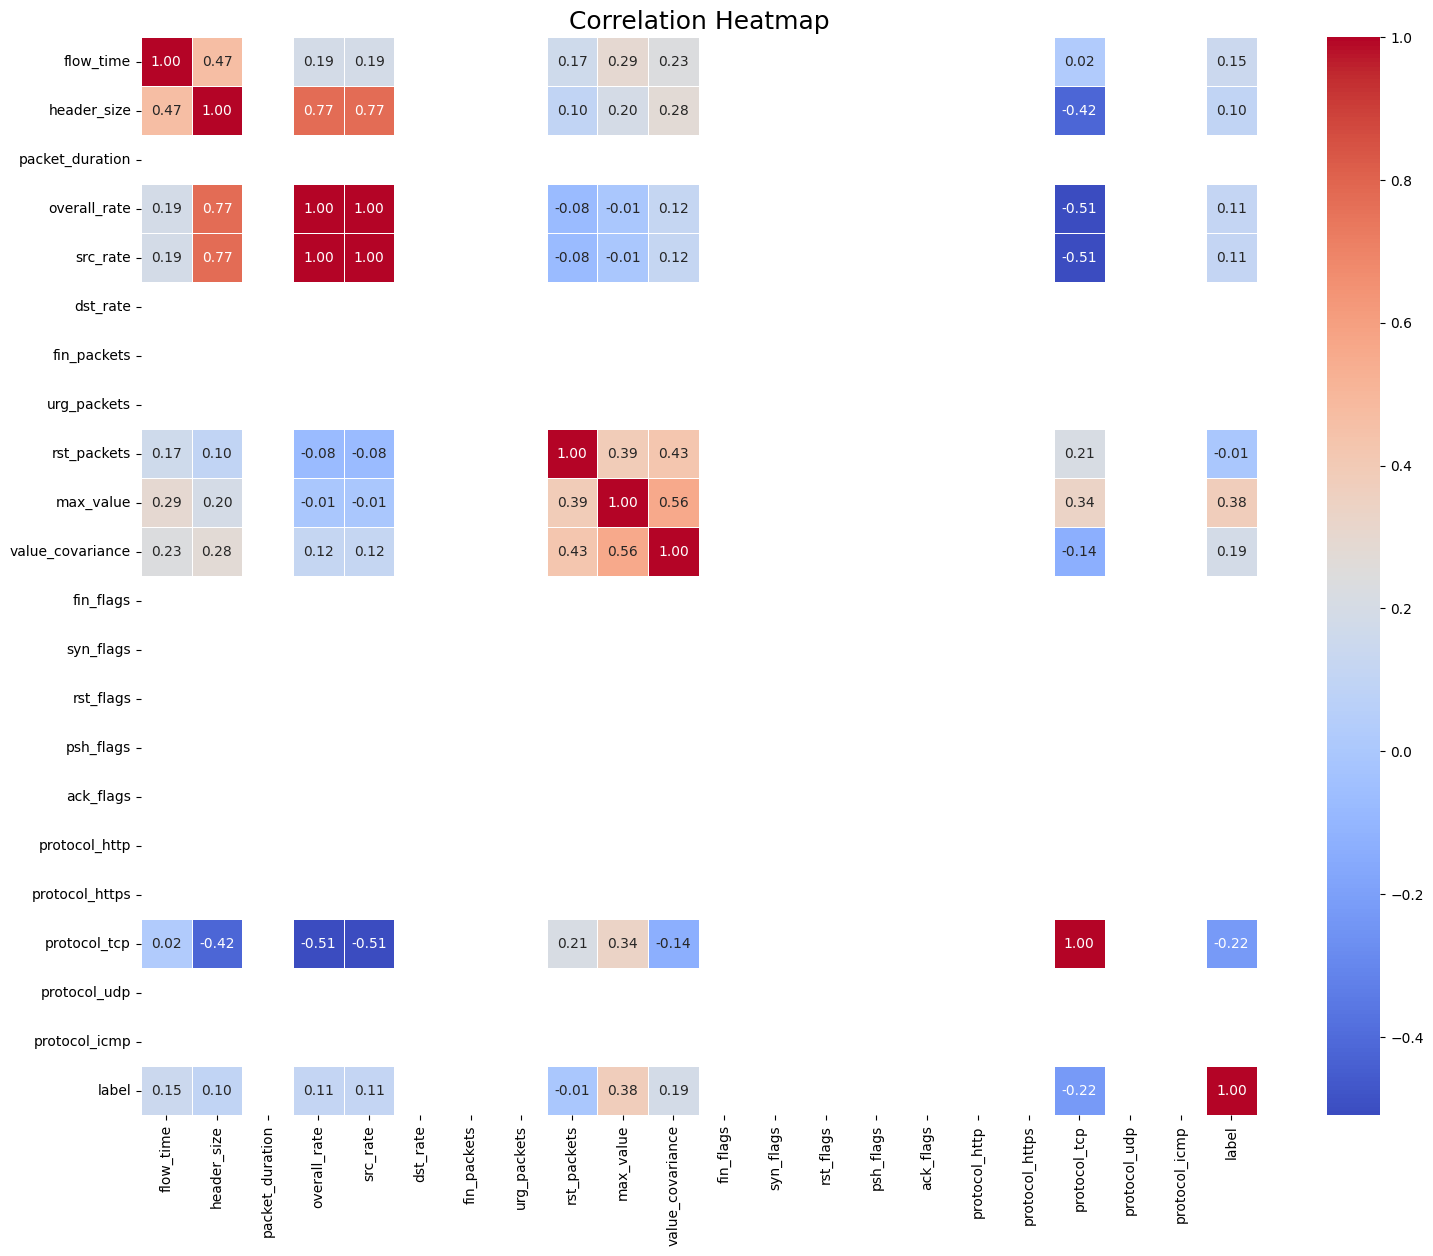

In [ ]:
numeric=dftrain.select_dtypes(include=['int','float'])
correlation_matrix = numeric.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dftrain.drop('label', axis=1), dftrain['label'], test_size=0.2, random_state=42)

In [ ]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, reference=lgb_train)

In [ ]:
params = {
    'objective': 'multiclass',
    'num_class': 6,
    'boosting_type': 'dart',
    'metric': 'multi_logloss',
    'class_weight': 'balanced',
    'max_depth': 6,
    'num_leaves': 40,
    'min_child_samples': 30,
    'bagging_fraction': 0.9,
    'bagging_freq': 5,
    'feature_fraction': 0.9,
    'learning_rate': 0.04,
    'verbosity': -1,
    'random_state': 42
}

In [ ]:
model = lgb.train(params,
                  train_set=lgb_train,
                  valid_sets=lgb_eval)

In [ ]:
y_pred_lgb = model.predict(x_test)
y_pred_lgb = np.argmax(y_pred_lgb, axis=1)

cr_lgb = classification_report(y_test, y_pred_lgb)
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
acc_lgb = accuracy_score(y_test, y_pred_lgb)

print(cr_lgb)
print("\n\n\n\n",cm_lgb)
print("\n\n\n\n",acc_lgb)

              precision    recall  f1-score   support

           0       0.67      0.90      0.76      4318
           1       0.89      0.95      0.92    137203
           2       0.79      0.49      0.61     32963
           3       0.51      0.47      0.49      1215
           4       0.79      0.91      0.84     10711
           5       0.66      0.29      0.41      1307

    accuracy                           0.86    187717
   macro avg       0.72      0.67      0.67    187717
weighted avg       0.85      0.86      0.85    187717





 [[  3870     63     62    247     39     37]
 [   481 130401   3931    182   2150     58]
 [   307  15916  16256     46    363     75]
 [   434    114     10    573     63     21]
 [   108    678    165     28   9728      4]
 [   614    169     89     40     13    382]]




 0.8587927571823543


In [ ]:
cr_lgb_dict = classification_report(y_test, y_pred_lgb, output_dict=True)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

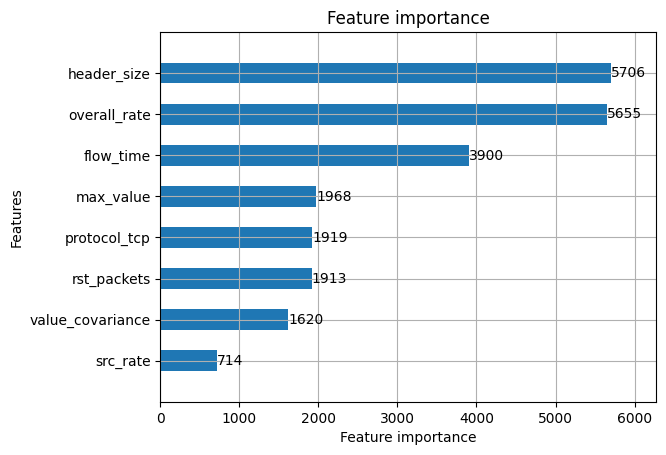

In [ ]:
lgb.plot_importance(model, height=.5)

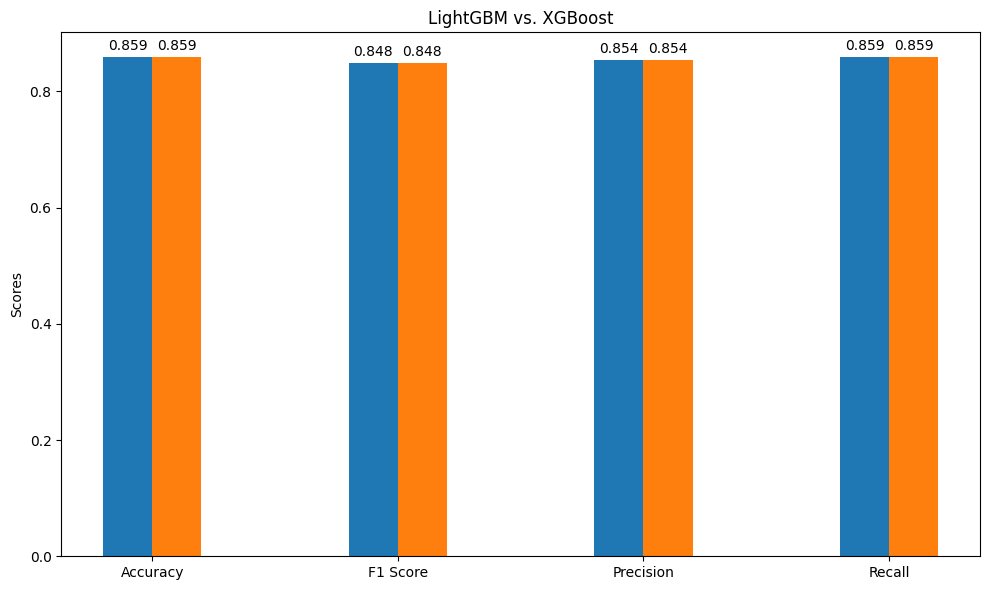

In [ ]:
F1_lgb = cr_lgb_dict["weighted avg"]["f1-score"]
F1_xgb = cr_xgb_dict["weighted avg"]["f1-score"]
F1_xgb = cr_rf_dict["weighted avg"]["f1-score"]
F1_lgb = cr_stack_dict["weighted avg"]["f1-score"]
p_lgb = cr_lgb_dict["weighted avg"]["precision"]
p_xgb = cr_xgb_dict["weighted avg"]["precision"]
p_rf = cr_rf_dict["weighted avg"]["precision"]
p_rf = cr_stack_dict["weighted avg"]["precision"]
r_lgb = cr_lgb_dict["weighted avg"]["recall"]
r_xgb = cr_xgb_dict["weighted avg"]["recall"]
r_rf = cr_rf_dict["weighted avg"]["recall"]
r_rf = cr_stack_dict["weighted avg"]["recall"]
models = ["LightGBM", "XGBoost","Random Forest", "Stack"]
metrics = ["Accuracy", "F1 Score", "Precision", "Recall"]
scores_lgb = [acc_lgb, F1_lgb, p_lgb, r_lgb]
scores_xgb = [acc_xgb, F1_xgb, p_xgb, r_xgb]
scores_rf = [acc_rf, F1_rf, p_rf, r_rf]
scores_stack = [acc_stack, F1_stack, p_stack, r_stack]
positions_on_graph_X = np.arange(len(metrics))
width = 0.05

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(positions_on_graph_X - width/2, scores_lgb, width, label="LightGBM")
rects2 = ax.bar(positions_on_graph_X - width/4, scores_xgb, width, label="XGBoost")
rects3 = ax.bar(positions_on_graph_X + width/4, scores_rf, width, label="Random Forest")
rects4 = ax.bar(positions_on_graph_X + width/2, scores_stack, width, label="Stack")

ax.set_ylabel("Scores")
ax.set_title("LightGBM vs. XGBoost vs. Random Forest vs. Stack")
ax.set_xticks(positions_on_graph_X)
ax.set_xticklabels(metrics)
fig.tight_layout()
ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')
ax.bar_label(rects3, padding=3, fmt='%.2f')
ax.bar_label(rects4, padding=3, fmt='%.2f')
plt.show()

In [ ]:
y_pred_lgb_categorical = le.inverse_transform(y_pred_lgb)
predictions_df_lgb = pd.DataFrame({"Id": range(len(y_pred_lgb_categorical)), "label": y_pred_lgb_categorical})
predictions_df_lgb.to_csv("test_predictions_lgb.csv", index=False)

In [ ]:
categorical_features = train.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('label')

In [ ]:

train_enc = pd.get_dummies(train, columns=categorical_features, drop_first=True)

X = train_enc.drop(columns=['label'])
y = train_enc['label']


In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_leaf=5,
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
y_val_pred = rf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:", classification_report(y_val, y_val_pred))

In [ ]:
test = pd.read_csv('/content/train.csv')

# 8. One-hot encode test, aligning it to train features
# One-hot encode categorical features in the test set, excluding 'label'
test_enc = pd.get_dummies(test, columns=categorical_features, drop_first=True)

# Ensure test has same columns as train
test_enc = test_enc.reindex(columns=X.columns, fill_value=0)

# 9. Predict on test
test_preds = rf.predict(test_enc)
